In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/My Drive/Colab Notebooks")
os.getcwd()

Mounted at /content/drive/


'/content/drive/My Drive/Colab Notebooks'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 2.1 Images

1. Load sudoku-original.png image in grayscale mode.
2. Plot the histogram of intensities.
3. Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square.

### 2.1.1 Load sukoku-original.png image in grayscale mode.

(423, 419, 3)


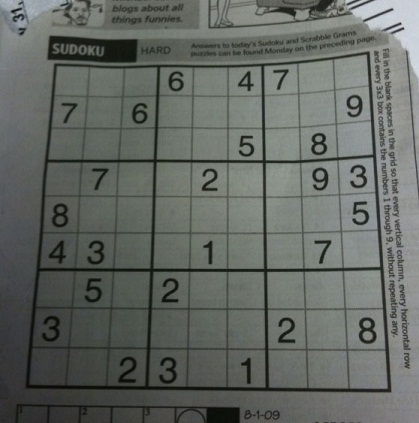

In [110]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Attachments_HW1/sudoku-original.png',)
print(img.shape)
cv2_imshow(img)

### 2.1.2 Plot the histogram of intensities.

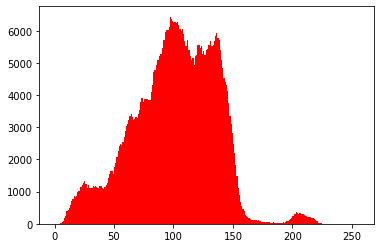

In [ ]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

### 2.1.3 Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square.

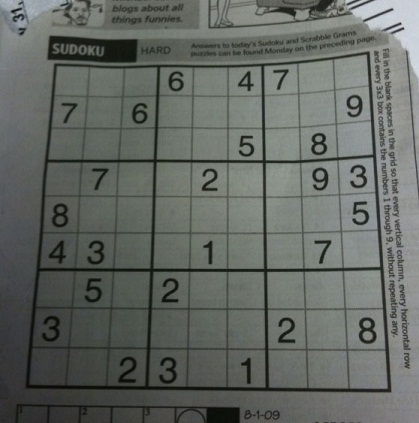

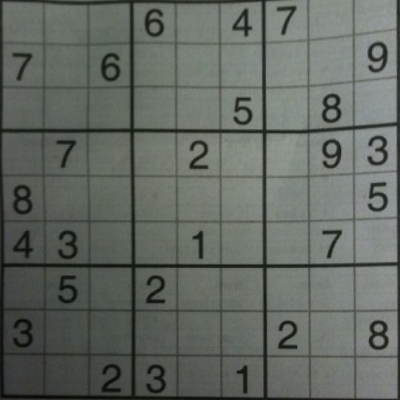

In [122]:
from google.colab.patches import cv2_imshow

src = np.float32([[55, 65], [370, 65], [25, 390], [390, 390]])
dst = np.float32([[0, 0], [400, 0], [0, 400], [400, 400]])
     
matrix = cv2.getPerspectiveTransform(src, dst)
cropped = cv2.warpPerspective(img, matrix, (400, 400))
     
cv2_imshow(img) 
cv2_imshow(cropped) 

# 2.2 Time Series

### 2.2.1 Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.

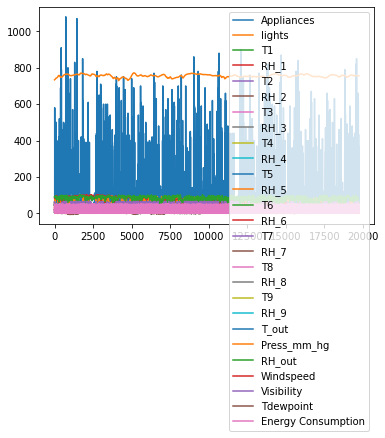

In [3]:
ts_data = pd.read_csv (r'/content/drive/My Drive/Colab Notebooks/Attachments_HW1/energydata_complete.csv')
ts_data.plot()

In [ ]:
ts_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097


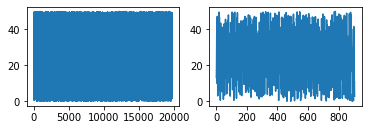

In [7]:
energy_consumption = ts_data['Energy Consumption']
ts_data['date'] = pd.to_datetime(ts_data['date'])


plt.figure()
plt.subplot(221)
plt.plot(energy_consumption)

plt.subplot(222)
plt.plot(energy_consumption[(ts_data['date'] > '2016-01-11') & (ts_data['date'] <= '2016-01-18')])

### 2.2.2 Plot heatmap of hourly consumption of appliances for a week. 


In [72]:
date = ts_data['date']
date = date.to_string()
date_split = date.split( )
date_df = pd.DataFrame(columns=['Hours'])

length = list(range(len(date_df)))
hms_df = pd.DataFrame(columns=['Hours', 'Mins', 'Secs'])
j = 0
for i in length:
  now = date_df['Hours'][i]
  hrs, mins, secs = now.split(':')
  hms_df.loc[j] = [hrs, mins, secs]
  j = j + 1

In [107]:
ts_data['day'] = pd.DatetimeIndex(ts_data['date']).day
new_df = pd.concat([ts_data, hms_df], axis=1)
week_df = new_df[(new_df['date'] > '2016-02-11') & (new_df['date'] < '2016-02-18')]
week_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,day,Hours,Mins,Secs
4363,2016-02-11 00:10:00,70,20,21.133333,43.466667,20.666667,41.363333,20.823333,42.230000,20.10,44.863333,19.715000,73.210556,2.530000,90.833333,20.21,40.411111,23.044444,48.040000,18.890000,43.126667,3.32,747.366667,97.166667,3.000000,63.166667,2.85,43.740768,11,00,10,00
4364,2016-02-11 00:20:00,50,20,21.166667,43.400000,20.600000,41.290000,20.890000,42.267500,20.10,44.730000,19.700000,72.576111,2.545000,91.150000,20.20,40.381667,23.050000,48.030000,18.890000,43.200000,3.43,747.433333,97.333333,3.000000,63.333333,3.00,7.171829,11,00,20,00
4365,2016-02-11 00:30:00,30,0,21.100000,43.326667,20.600000,41.260000,20.823333,42.200000,20.10,44.663333,19.661111,71.850000,2.860000,91.793333,20.20,40.308333,23.005556,48.015000,18.890000,43.200000,3.55,747.500000,97.500000,3.000000,63.500000,3.15,8.391388,11,00,30,00
4366,2016-02-11 00:40:00,40,0,21.066667,43.363333,20.533333,41.260000,20.890000,42.290000,20.10,44.590000,19.600000,71.043333,3.133333,92.060000,20.20,40.387778,23.000000,48.200556,18.890000,43.295000,3.67,747.566667,97.666667,3.000000,63.666667,3.30,10.924970,11,00,40,00
4367,2016-02-11 00:50:00,20,0,21.000000,43.363333,20.500000,41.290000,20.823333,42.230000,20.00,44.363333,19.561111,70.486667,3.326667,92.226667,20.15,40.450000,23.000000,48.498333,18.890000,43.466667,3.78,747.633333,97.833333,3.000000,63.833333,3.45,49.703324,11,00,50,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,2016-02-17 23:10:00,40,0,21.166667,35.230000,19.550000,36.450000,19.905714,36.485714,18.79,36.200000,19.000000,44.520000,-1.700000,77.766667,18.79,28.730000,21.700000,39.260000,18.000000,37.645000,-0.95,755.383333,91.666667,2.166667,62.000000,-2.10,41.206182,17,23,10,00
5366,2016-02-17 23:20:00,50,0,21.100000,35.397500,19.463333,36.590000,19.890000,36.576000,18.70,36.163333,19.000000,44.028571,-1.700000,78.826667,18.79,28.856667,21.700000,39.530000,17.963333,37.730000,-0.80,755.366667,91.333333,2.333333,62.000000,-2.00,34.773326,17,23,20,00
5367,2016-02-17 23:30:00,60,0,21.100000,35.500000,19.390000,36.590000,19.890000,36.700000,18.70,36.090000,18.956000,43.554000,-1.760000,79.033333,18.70,29.033333,21.675000,39.590000,17.963333,37.863333,-0.65,755.350000,91.000000,2.500000,62.000000,-1.90,31.704055,17,23,30,00
5368,2016-02-17 23:40:00,50,0,21.100000,35.590000,19.290000,36.730000,19.890000,36.736000,18.70,36.000000,18.890000,43.284286,-1.790000,79.356667,18.70,29.100000,21.600000,39.723333,17.963333,37.933333,-0.50,755.333333,90.666667,2.666667,62.000000,-1.80,14.388912,17,23,40,00


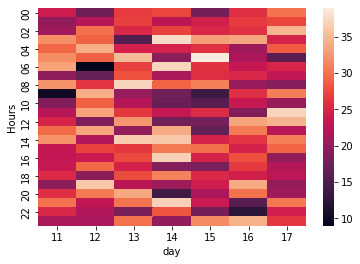

In [108]:
import seaborn as sns
app = week_df.pivot_table(index="Hours",columns="day",values='Energy Consumption',aggfunc="mean")
ax = sns.heatmap(app)

### 2.2.3 Plot the histogram of energy consumption of appliances.


(array([1.6238e+04, 1.7230e+03, 8.3900e+02, 4.9300e+02, 2.1200e+02,
        1.3000e+02, 6.9000e+01, 2.4000e+01, 5.0000e+00, 2.0000e+00]),
 array([  10.,  117.,  224.,  331.,  438.,  545.,  652.,  759.,  866.,
         973., 1080.]),
 <a list of 10 Patch objects>)

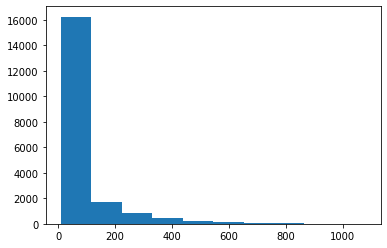

In [ ]:
plt.hist(ts_data['Appliances'])

In [84]:
date = ts_data['date']
date = date.to_string()
date_split = date.split( )
date_df = pd.DataFrame(columns=['Hours'])

i = 2
j = 0
while i <= len(date_split):
  nsm = date_split[i]
  date_df.loc[j] = [nsm]
  i = i + 3
  j = j + 1

date_df

,Hours
0,17:00:00
1,17:10:00
2,17:20:00
3,17:30:00
4,17:40:00
...,...
19730,17:20:00
19731,17:30:00
19732,17:40:00
19733,17:50:00


### 2.2.4 Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

In [57]:
from datetime import datetime

length = list(range(len(date_df)))
nsm_df = pd.DataFrame(columns=['NSM'])
j = 0
for i in length:
  now = date_df['Hours'][i]
  hrs, mins, secs = now.split(':')
  nsm = (int(hrs) * 3600) + (int(mins) * 60) + int(secs)
  nsm_df.loc[j] = [nsm]
  j = j + 1


64800


In [65]:
final_df = pd.concat([nsm_df, ts_data], axis=1)
final_df

,NSM,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,61200,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,61800,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,62400,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,63000,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,63600,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,62400,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,63000,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,63600,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,64200,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


In [60]:
nsm_df['NSM'][54]

7200

In [61]:
date_df['Hours'][54]

'02:00:00'

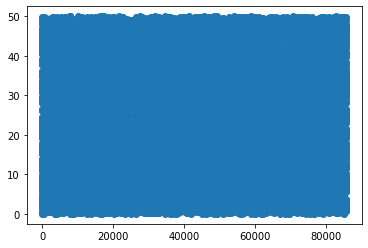

In [68]:
plt.scatter(final_df['NSM'],final_df['Energy Consumption'])

### 2.2.5  Plot appliances energy consumption vs. Press mm Hg.

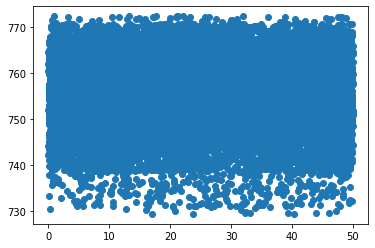

In [67]:
plt.scatter(energy_consumption, ts_data['Press_mm_hg'])

### 2.2.6  It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.

Number of seconds after midnight is really just a way to show at what time of day are you using these applicances. During peak sunlight hours you would be using an appliance more often especially if it's related to keeping temperatures cool or your daily activities. Lights, on the other hand, would be used most often during the times closest to midnight. Then you'd expect very little usage of appliances in the hours directly after the midnight hour. 

I'm not entirely sure how pressure would factor into this. High pressure is associated with storms (high pressure systems) which would drive up appliance usage due to being inside a home more often. Lower air pressure is also associated with altitude where appliances tend to take longer to perform as they would at sea level. It also tends to be colder at altitude which would increase appliance usage. 

# 2.3 Multivariate

1. Mean
2. Variance (or Standard Deviation)
3. Median
4. Kurtosis
5. Skewness
6. Range


In [ ]:
dat = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Attachments_HW1/airfoil_self_noise.dat', unpack = True)
dat = np.reshape(dat, (1503, 6))
df = pd.DataFrame(dat, columns = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (m)', 
                                  'Free-stream velocity (m/s)', 'Suction side displacement thickness (m)',
                                  'Scaled sound pressure level (decibels)'])
df.head()

,Frequency (Hz),Angle of attack (degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels)
0,800.0,1000.0,1250.0,1600.0,2000.0,2500.0
1,3150.0,4000.0,5000.0,6300.0,8000.0,10000.0
2,12500.0,16000.0,500.0,630.0,800.0,1000.0
3,1250.0,1600.0,2000.0,2500.0,3150.0,4000.0
4,5000.0,6300.0,8000.0,10000.0,12500.0,200.0


In [ ]:
import statistics as stat
import scipy.stats
from scipy.stats import kurtosis, skew

ans = pd.DataFrame(columns = ['Mean', 'Variance', 'Median','Kurtosis', 'Skewness', 
                              'Range'], index = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (m)', 
                              'Free-stream velocity (m/s)', 'Suction side displacement thickness (m)',
                              'Scaled sound pressure level (decibels)'])
col = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (m)', 
                                  'Free-stream velocity (m/s)', 'Suction side displacement thickness (m)',
                                  'Scaled sound pressure level (decibels)']
                                  
for hd in col: 
  mean = stat.mean(df[hd])
  var = stat.variance(df[hd])
  med = stat.median(df[hd])
  kurt = kurtosis(df[hd])
  skewness = skew(df[hd])
  range = max(df[hd]) - min(df[hd])
  ans.loc[hd] = [mean, var, med, kurt, skewness, range]

ans

,Mean,Variance,Median,Kurtosis,Skewness,Range
Frequency (Hz),484.230262,2362428.696338,22.2,27.285864,4.870196,12500.0
Angle of attack (degrees),482.991346,2479419.466259,22.2,36.443965,5.429475,16000.0
Chord length (m),515.15414,2830452.009195,22.2,38.763081,5.503177,20000.0
Free-stream velocity (m/s),538.879826,3351028.529855,31.7,44.369919,5.899982,20000.0
Suction side displacement thickness (m),510.128057,2698766.84261,31.7,35.610912,5.247866,20000.0
Scaled sound pressure level (decibels),537.623619,2998063.718358,31.7,30.42374,4.991377,20000.0
